In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [24]:
heart= pd.read_csv('/Users/dslearner23/Downloads/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [26]:
heart.shape

(1025, 14)

DATA CLEANING

1. CHECK NULL VALUES

In [27]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

2. CHECK DUPLICATES

In [28]:
heart.duplicated().sum()


723

3. REMOVING DUPLICATES

In [29]:
heart.drop_duplicates(inplace= True)

4. CHECK IF THE DUPLICATES ARE REMOVED

In [30]:
heart.duplicated().sum()


0

In [31]:
heart.shape

(302, 14)

Attribute Information:

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

DATA VISUALIZATION

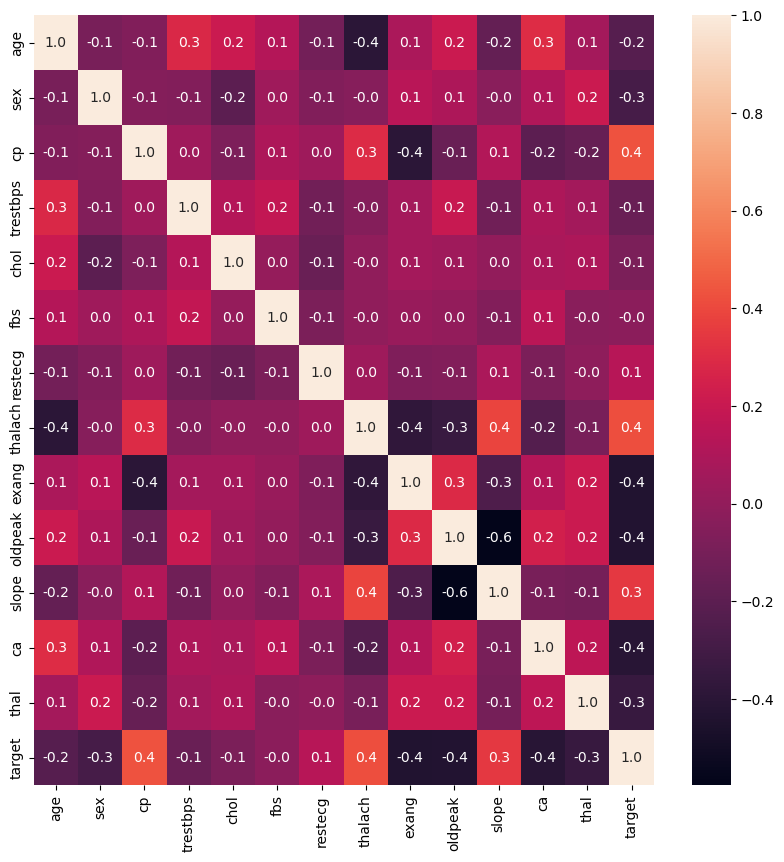

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(heart.corr(),annot=True,fmt='.1f')
plt.show()

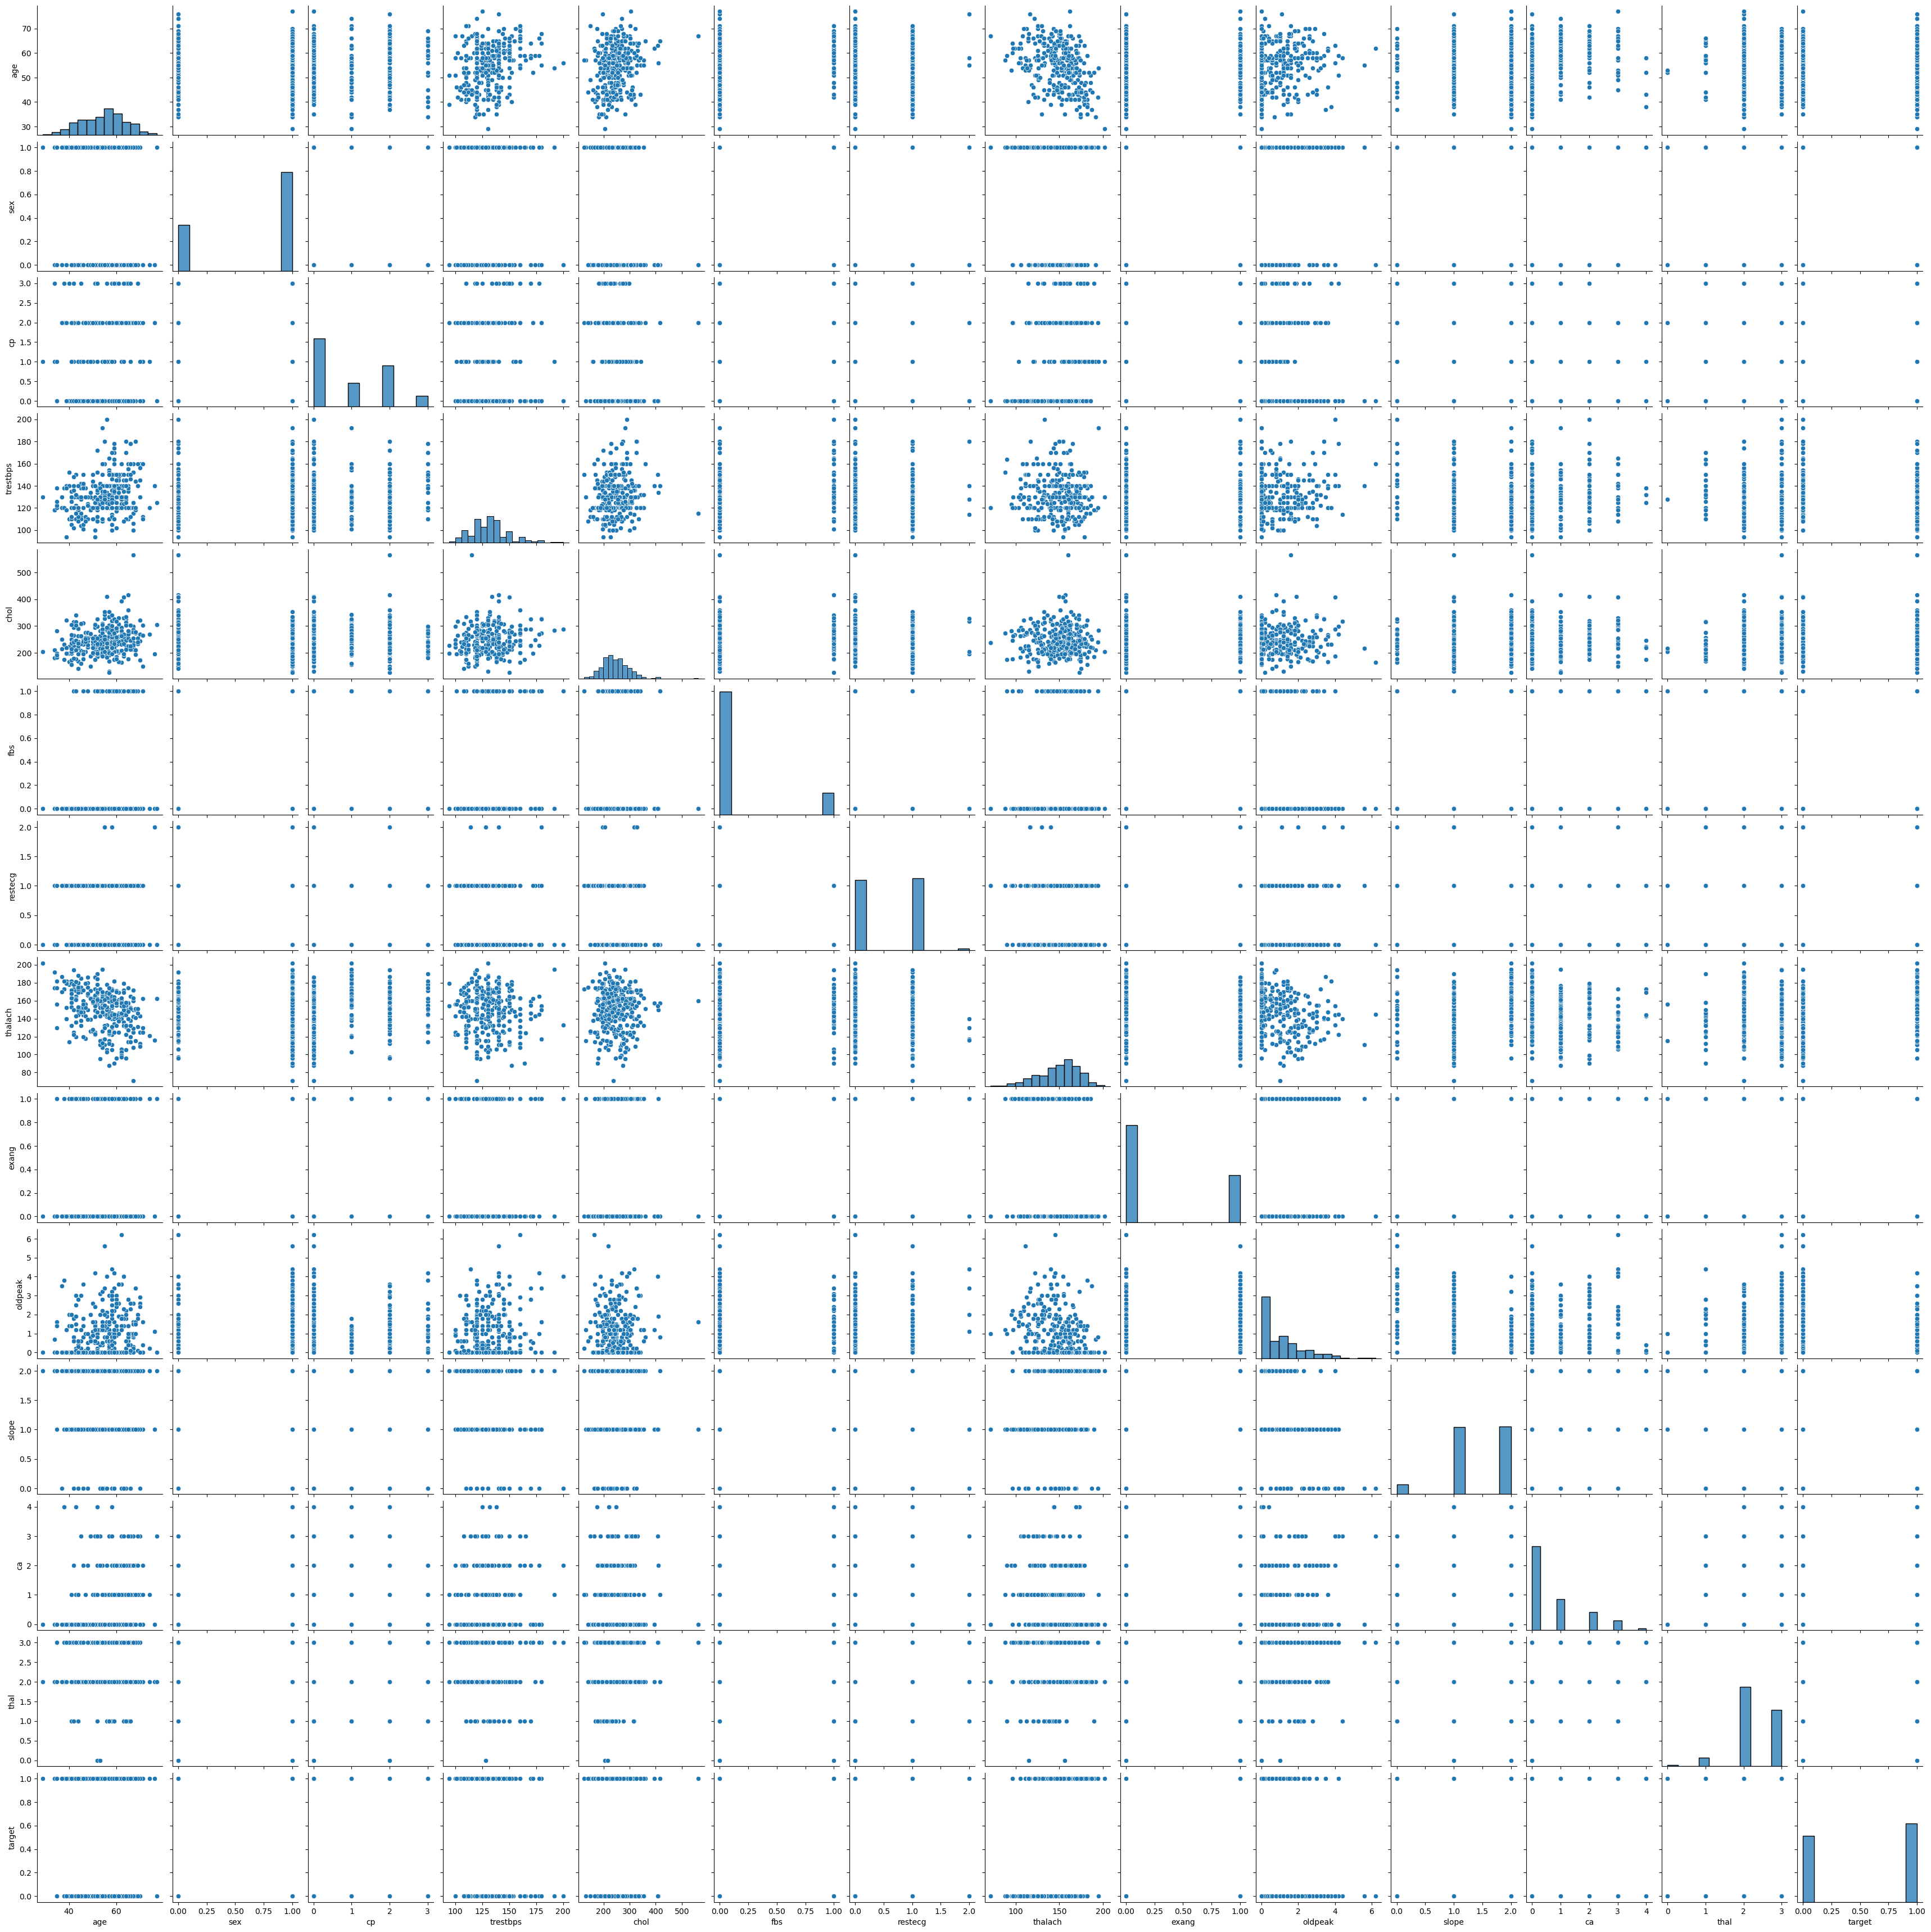

<Figure size 1000x500 with 0 Axes>

In [33]:
sns.pairplot(heart)
plt.figure(figsize=(10,5))
plt.show()

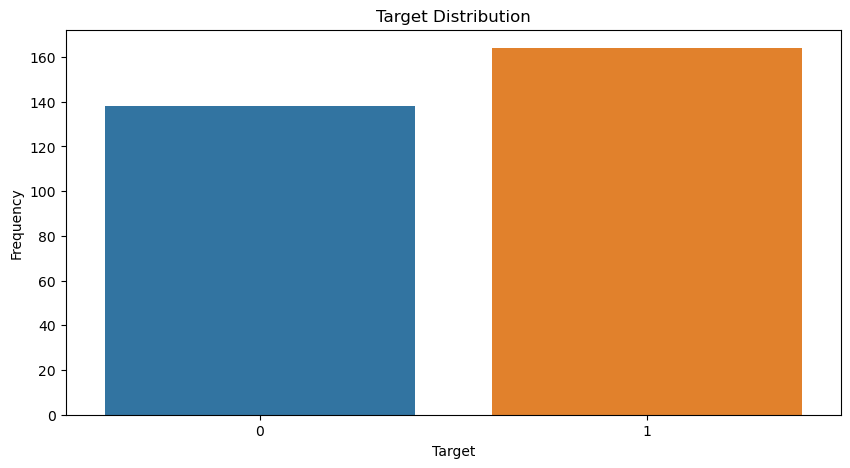

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='target', data=heart)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Target Distribution')
plt.show()

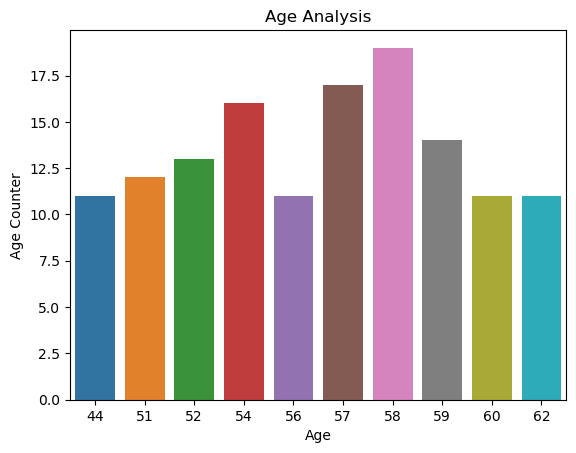

In [42]:
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis')
plt.show()

FIND MIN AND MAX AGES

In [38]:
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.420529801324506


In [43]:
young_ages=heart[(heart.age>=29)&(heart.age<40)]
middle_ages=heart[(heart.age>=40)&(heart.age<55)]
elderly_ages=heart[(heart.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 15
Middle Ages : 128
Elderly Ages : 151


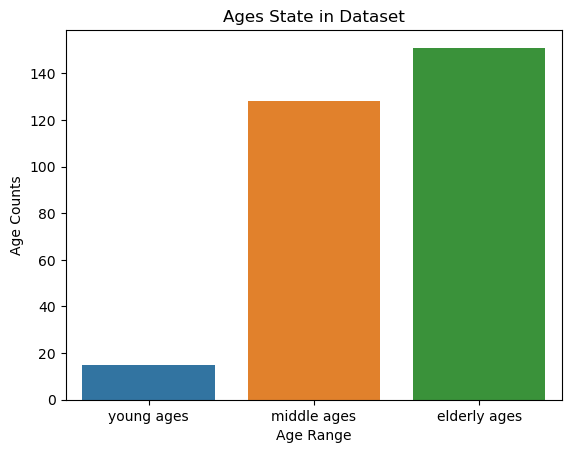

In [44]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

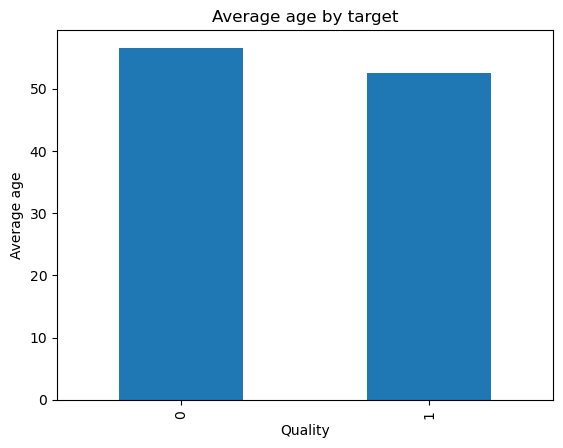

In [54]:
average_age = heart.groupby('target')['age'].mean()

average_age.plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Average age')
plt.title('Average age by target')
plt.show()

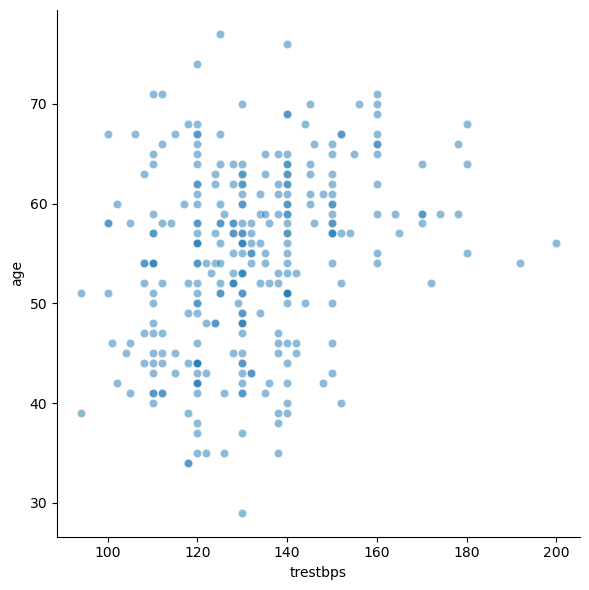

In [56]:
sns.relplot(x="trestbps", y="age",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=heart)

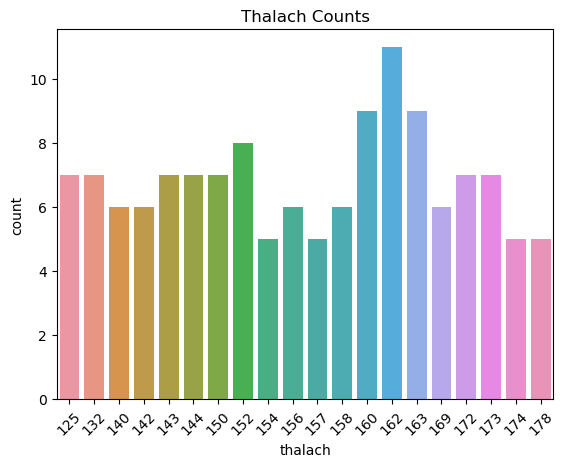

In [58]:
sns.barplot(x=heart.thalach.value_counts()[:20].index,y=heart.thalach.value_counts()[:20].values)
plt.xlabel('thalach')
plt.ylabel('count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()